In [1]:
#This code detects objects using Faster RCNN
#You may need to install the following libraries

In [3]:
#pip install torch torchvision

In [27]:
import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
from PIL import Image

In [7]:
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES) 

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


C:\Users\13604\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\13604\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


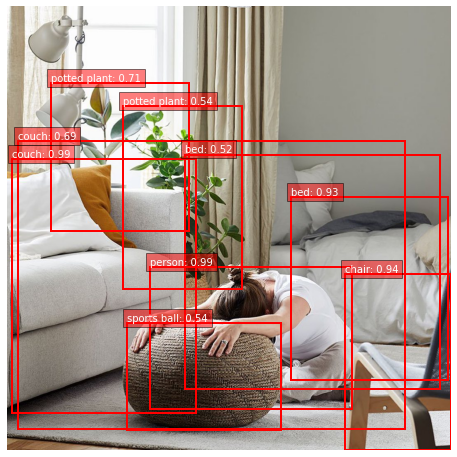

In [9]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "195.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

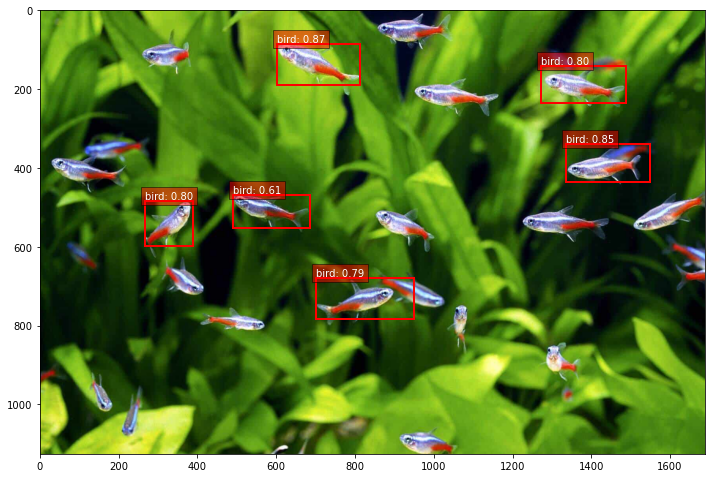

Inference Time: 12317.47 ms


In [31]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "Tetra.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


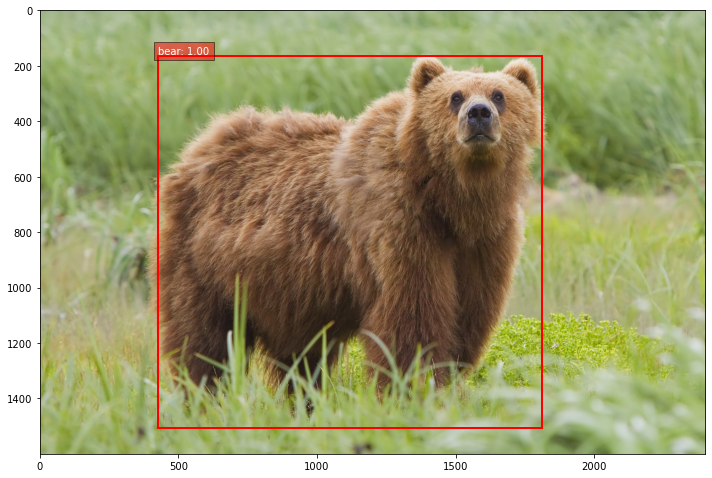

Inference Time: 19358.41 ms


In [32]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "Bear.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


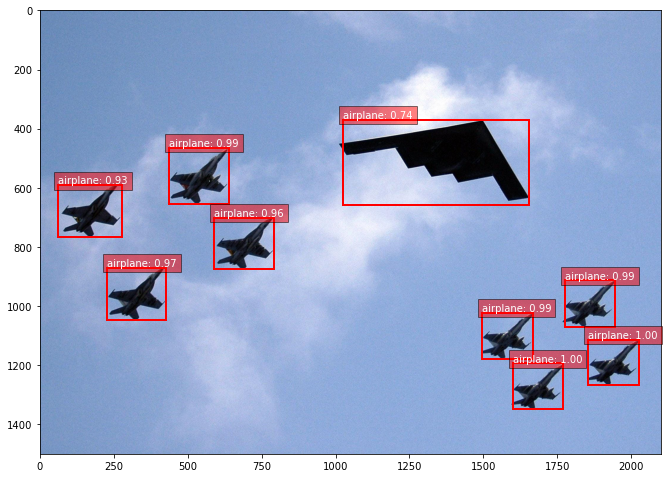

Inference Time: 10470.99 ms


In [35]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "Jets.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


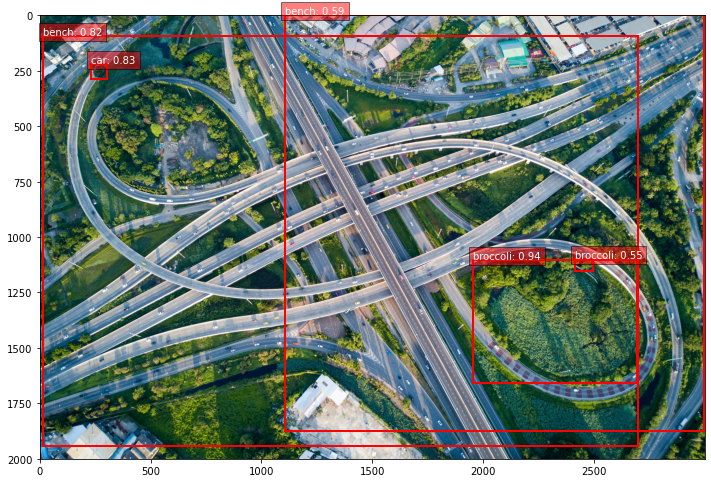

Inference Time: 5432.77 ms


In [37]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "highway.jpeg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


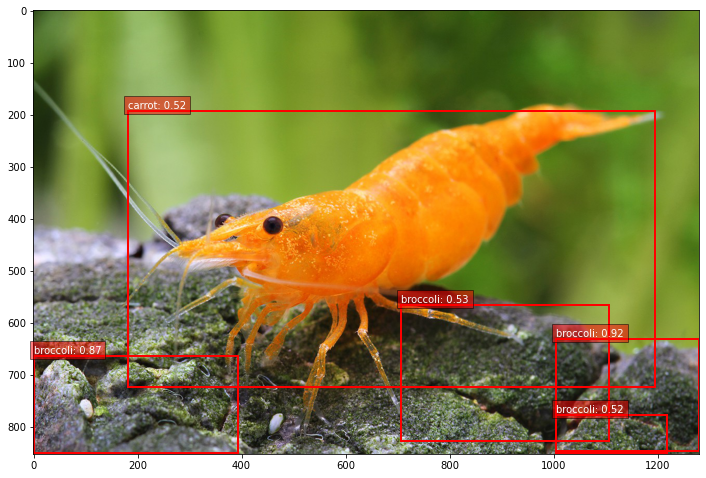

Inference Time: 16289.51 ms


In [39]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "Shrimp.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


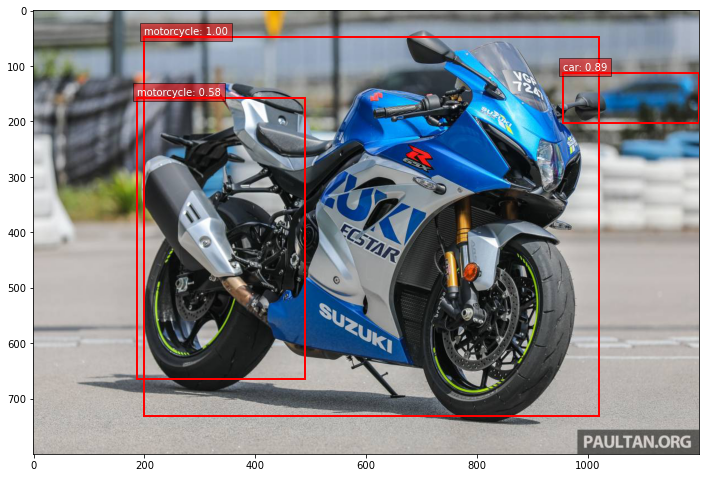

Inference Time: 14122.29 ms


In [41]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "gsxr.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


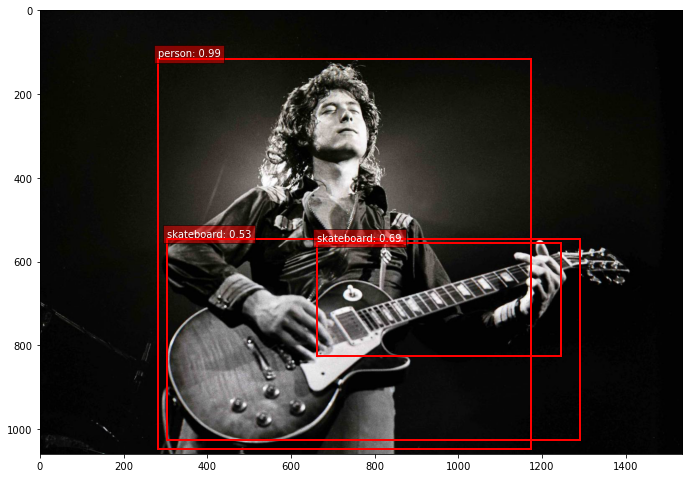

Inference Time: 11858.27 ms


In [43]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "page.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


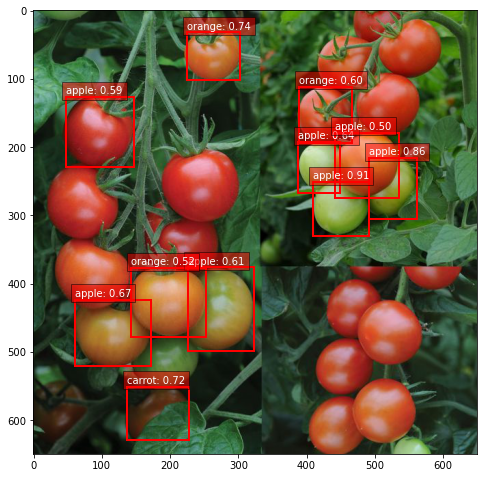

Inference Time: 3402.70 ms


In [49]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "tomatoe.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


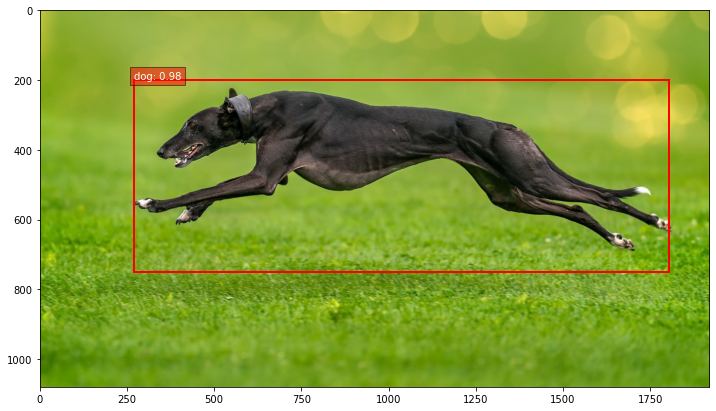

Inference Time: 4922.07 ms


In [51]:
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "greyhound.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("on")  # Hide axes for better visualization
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model([image_tensor])
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")
